In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [22]:
file_path = 'C:/Users/12469/Desktop/try_regress.xlsx'
data = pd.read_excel(file_path)
data.iloc[:10]

,销量(kg),毛利率
0,35.365,0.603026
1,48.510,0.708050
2,42.442,0.749383
3,47.262,0.669301
4,73.213,0.700236
5,40.578,0.673983
6,52.560,0.700026
7,43.968,0.690346
8,37.837,0.701466
9,41.429,0.678761


In [23]:
data.insert(data.shape[1],'毛利率分位值',0)
data.insert(data.shape[1],'销量分位值',0)

In [24]:
price = np.array(data['毛利率'])
sales_vol = np.array(data['销量(kg)'])

max_price = price.max()
min_price = price.min()
max_sales = sales_vol.max()
min_sales = sales_vol.min()

max_price,min_price,min_sales,max_sales,

(1.7435150927670349, 0.20574090631166086, 3.012, 511.1360000000001)

In [25]:
def cal_price(x):
    return (x - min_price) /(max_price - min_price)
def cal_sales(x):
    return (x - min_sales) /(max_price - max_sales)
data['毛利率分位值'] =data['毛利率']   
data['销量分位值'] =data['销量(kg)']   
data['毛利率分位值'] = data['毛利率分位值'].map(cal_price)
data['销量分位值'] = data['销量分位值'].map(cal_sales)

In [26]:
data.iloc[:10]

,销量(kg),毛利率,毛利率分位值,销量分位值
0,35.365,0.603026,0.258351,-0.063513
1,48.510,0.708050,0.326647,-0.089318
2,42.442,0.749383,0.353525,-0.077406
3,47.262,0.669301,0.301449,-0.086868
4,73.213,0.700236,0.321565,-0.137813
5,40.578,0.673983,0.304493,-0.073747
6,52.560,0.700026,0.321429,-0.097269
7,43.968,0.690346,0.315134,-0.080402
8,37.837,0.701466,0.322366,-0.068366
9,41.429,0.678761,0.307600,-0.075417


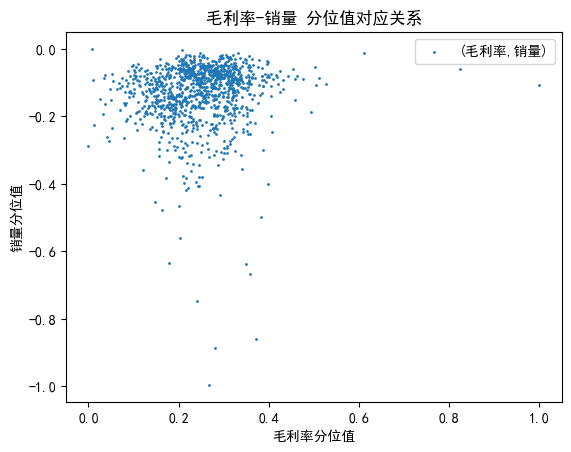

In [27]:
quar_price = np.array(data['毛利率分位值'])
quar_sales = np.array(data['销量分位值'])
plt.scatter(quar_price, quar_sales, s=1,label='(毛利率,销量)')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.xlabel('毛利率分位值')
plt.ylabel('销量分位值')
plt.legend()
plt.title('毛利率-销量 分位值对应关系')
plt.savefig('d:/try_regress.png')

In [28]:
write_path = 'd:/1.xlsx'
data.to_excel(write_path)